# Image Enhancement and Applications
This notebook demonstrates contrast enhancement techniques (global equalization, CLAHE), pseudo-coloring, and performance evaluation using contrast and entropy metrics.

In [ ]:
import sys
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath('../../'))

from src.visualization import compare_results, show_image, plot_histogram
from src.image_processing import apply_clahe, equalize_v_channel, pseudo_color

%matplotlib inline

✓ Enhancement Tools Loaded!


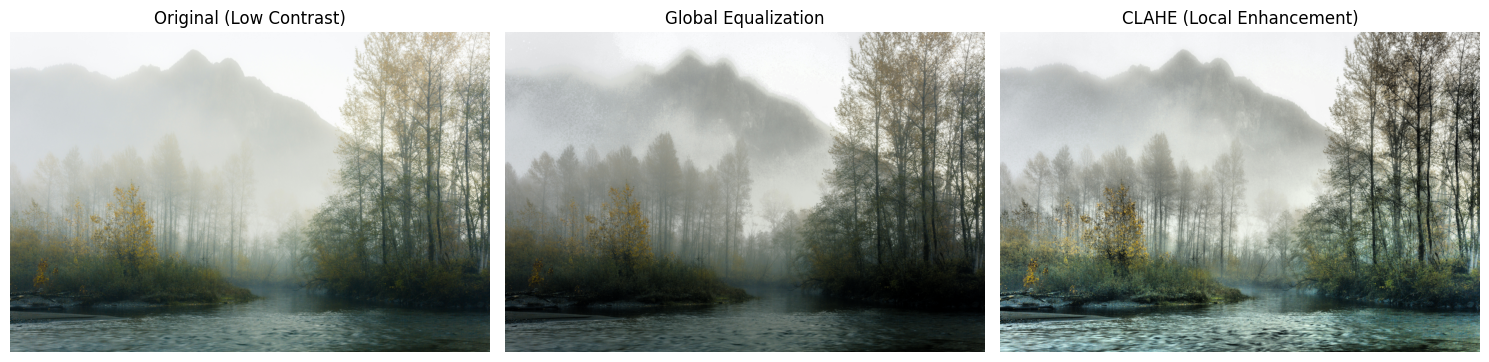

In [ ]:
foggy = cv2.imread('../../images/input/foggy.jpg')

global_eq = equalize_v_channel(foggy)

local_eq = apply_clahe(foggy, clip_limit=3.0, tile_grid=(8,8))

compare_results([foggy, global_eq, local_eq], 
                ["Original (Low Contrast)", "Global Equalization", "CLAHE (Local Enhancement)"])

## Contrast Enhancement Comparison
Comparing global histogram equalization vs. CLAHE on a low-contrast image.

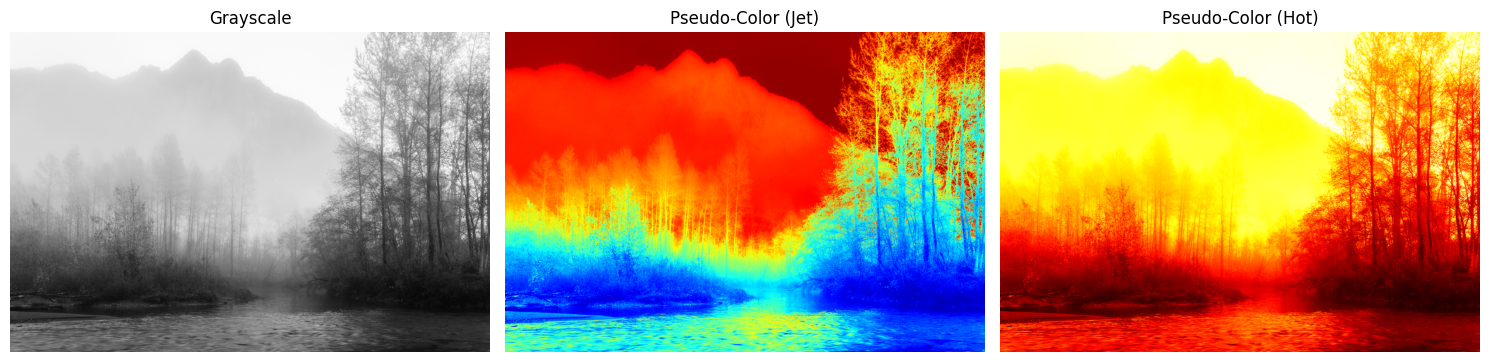

In [ ]:
gray_foggy = cv2.cvtColor(foggy, cv2.COLOR_BGR2GRAY)

colored_jet = pseudo_color(gray_foggy, colormap='jet')
colored_hot = pseudo_color(gray_foggy, colormap='hot')

compare_results([gray_foggy, colored_jet, colored_hot], 
                ["Grayscale", "Pseudo-Color (Jet)", "Pseudo-Color (Hot)"])

## Pseudo-Coloring
Applying color maps to grayscale images for visualization and feature emphasis.

In [8]:
def calculate_contrast(image):
    return np.std(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))

print(f"Original Contrast: {calculate_contrast(foggy):.2f}")
print(f"Global EQ Contrast: {calculate_contrast(global_eq):.2f}")
print(f"CLAHE Contrast: {calculate_contrast(local_eq):.2f}")

Original Contrast: 71.61
Global EQ Contrast: 74.96
CLAHE Contrast: 67.04


## Quantitative Assessment
Evaluating enhancement quality using contrast and entropy metrics.

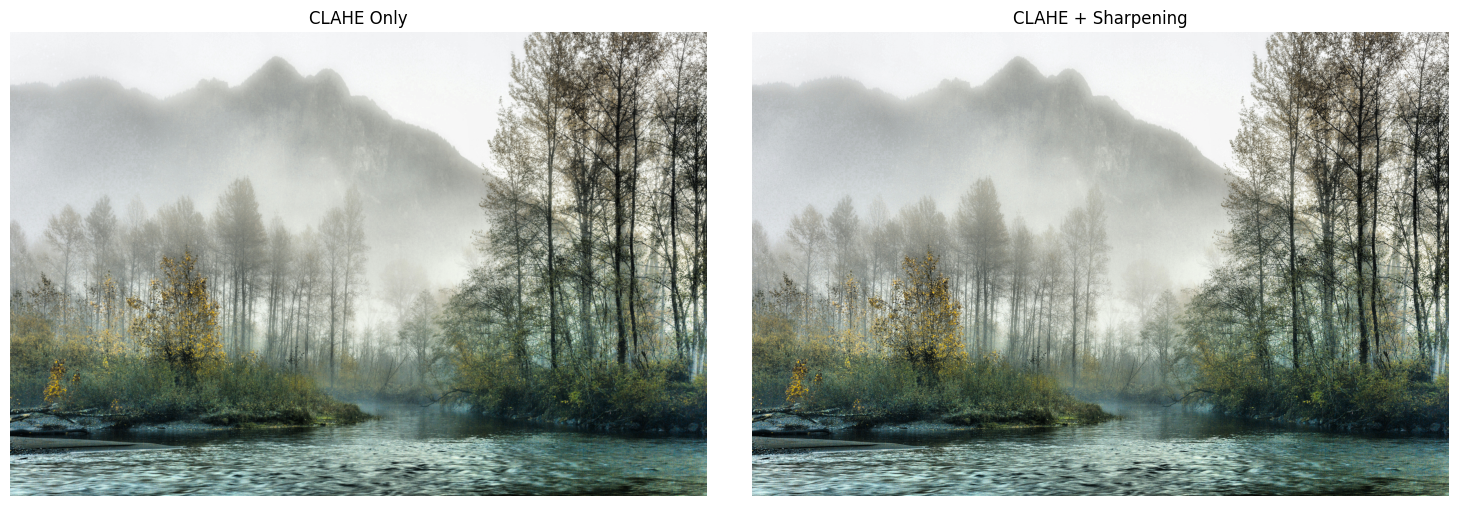

In [ ]:
def sharpen_image(image):
    blurred = cv2.GaussianBlur(image, (9, 9), 10.0)
    sharpened = cv2.addWeighted(image, 1.5, blurred, -0.5, 0)
    return sharpened

sharpened_clahe = sharpen_image(local_eq)
compare_results([local_eq, sharpened_clahe], ["CLAHE Only", "CLAHE + Sharpening"])

## Additional Processing
Combining CLAHE with sharpening and saturation boosting for final output.

In [ ]:
import scipy.stats

def calculate_entropy(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
    hist_norm = hist.ravel() / hist.sum()
    return scipy.stats.entropy(hist_norm)

print(f"Original Entropy: {calculate_entropy(foggy):.4f}")
print(f"CLAHE Entropy: {calculate_entropy(local_eq):.4f}")

Original Entropy: 5.2055
CLAHE Entropy: 5.4117


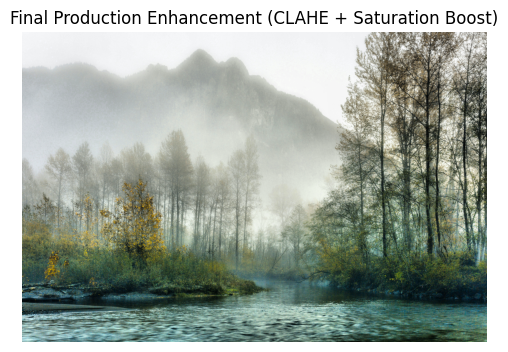

In [ ]:
def boost_saturation(image, factor=1.2):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    
    s_boosted = np.clip(s.astype(np.float32) * factor, 0, 255).astype(np.uint8)
    
    return cv2.cvtColor(cv2.merge([h, s_boosted, v]), cv2.COLOR_HSV2BGR)

vibrant_clahe = boost_saturation(local_eq, factor=1.3)
show_image(vibrant_clahe, "Final Production Enhancement (CLAHE + Saturation Boost)")